# Stage.2 the experiment of OCIL and weight of categorical features

#### Research manuscript - timestamp:2020.10.10
Last week I conducted a clustering experiment on the data set mentioned in the paper. And At the same time I drew some figures which were made of the relationship between the parameters of the categorical features and the accuracy of the algorithm.This week I have built the function named "scatterShow" and "accuracyFigure" which were applied to the experiment. And I also collected all my code so far into a package named OCIL.py. It can be uesd in the feature experientment.

### the dataset of iris
The data set used in the first week of the experiment is also tested here. And the iris data set is a total numerical datasets

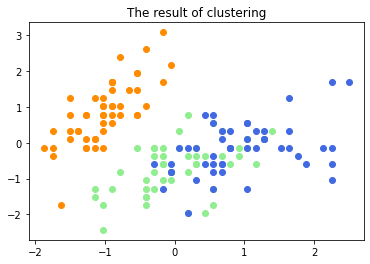

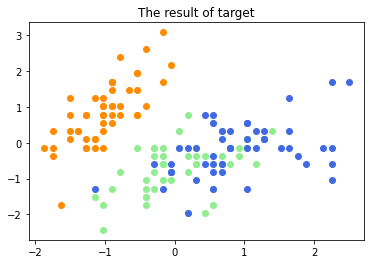

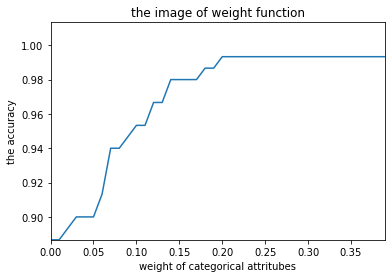

In [1]:
import OCIL 
import copy
import numpy as np
from sklearn.datasets import load_iris
klist = [30,80,120]
iris = load_iris()
clusterNNew = iris.data[klist,:]
clusterCate = iris.target.reshape(150,1)
clusterC = clusterCate.astype(np.object)
clusterCNew = copy.deepcopy(clusterC[klist,:])
OCIL.scatterShow(clusterC,iris.data,clusterCNew,clusterNNew,20,0.2,clusterCate[:,0],0,1)
OCIL.accuracyFigure(clusterC,iris.data,clusterCNew,clusterNNew,20,0.0,0.4,0.01,clusterCate[:,0])

### the dataset of Credit Card
I used the dataset of the Credit card which was downloaded from UCI repository, The results of clustering was clear and we can see the accuracy shift by the variety of the weight of categorical attritubes.

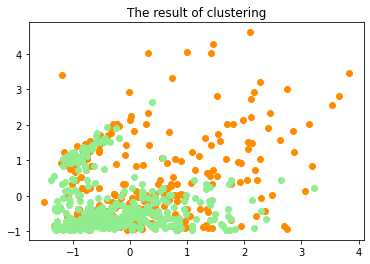

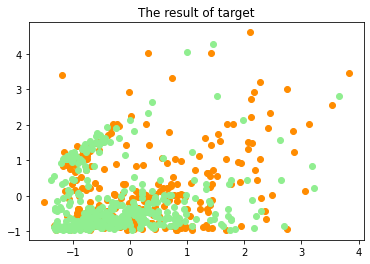

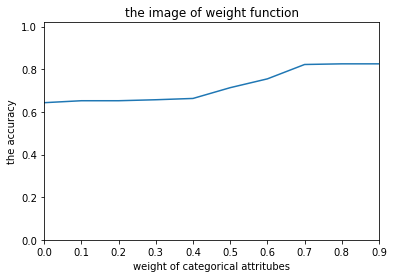

In [1]:
import OCIL 
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
df_crx = pd.read_table("./Credit_card_data/crx.data", sep = ",")
df_crx = df_crx.dropna()#delete the rows with missing value
targetLabel = []
for i in range(len(df_crx["A16"].values)):
    if df_crx["A16"].values[i] == "+":
        targetLabel.append(0)
    else:
        targetLabel.append(1)
preDataN = df_crx[["A2","A3","A8","A11","A14","A15"]].values
dataC = df_crx[["A1","A4","A5","A6","A7","A9","A10","A12","A13"]].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.mat(preprocessing.scale(preDataN[:,i]))#.reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.mat(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
#klist = [30,620]
#clusterC = dataC[klist,:]
#clusterN = dataN[klist,:]
clusterC, clusterN = OCIL.clusterUpdate(dataC, dataN, targetLabel)
OCIL.scatterShow(dataC, dataN, clusterC, clusterN, 10, 0.7, targetLabel, 0, 1)
OCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.1,targetLabel)

### The datasets of German credit

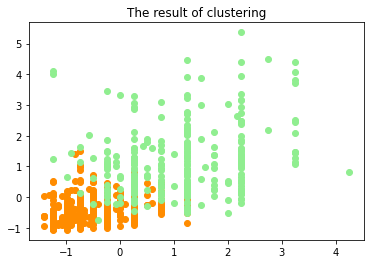

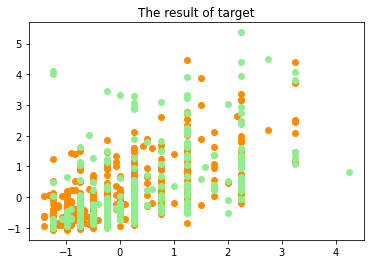

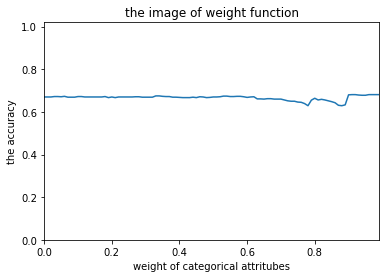

In [1]:
import OCIL 
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
df_GerCre = pd.read_table("./German_credit/german.data", sep = " ")
targetLabel = []
for i in range(len(df_GerCre["Classification"].values)):
    if df_GerCre["Classification"].values[i] == 1:
        targetLabel.append(0)
    else:
        targetLabel.append(1)
preDataN = df_GerCre[["Attribute2","Attribute5","Attribute8","Attribute11","Attribute13","Attribute16","Attribute18"]].values
dataC = df_GerCre[["Attribute1","Attribute3","Attribute4","Attribute6","Attribute7","Attribute9","Attribute10","Attribute12","Attribute14","Attribute15","Attribute17","Attribute19","Attribute20"]].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.mat(preprocessing.scale(preDataN[:,i]))#.reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.mat(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
#klist = [30,-1]
#clusterC = dataC[klist,:]
#clusterN = dataN[klist,:]
clusterC, clusterN = OCIL.clusterUpdate(dataC, dataN, targetLabel)
OCIL.scatterShow(dataC, dataN, clusterC, clusterN, 20, 0.7, targetLabel, 0, 1)
OCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.01,targetLabel)

### the dataset of the Statlog heart

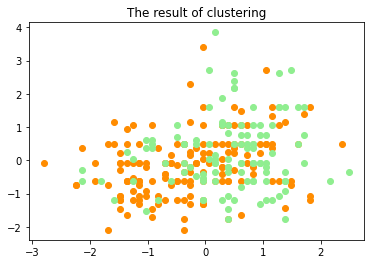

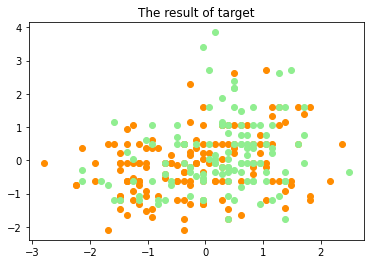

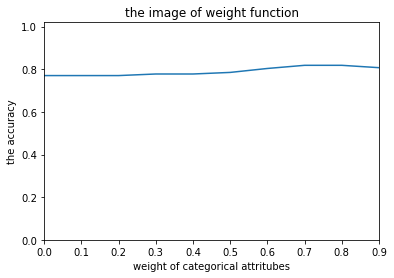

In [1]:
import OCIL 
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
df_Statlog = pd.read_table("./Statlog_heart_data/heart.dat", sep = " ")
targetLabel = []
for i in range(len(df_Statlog["Classification"].values)):
    if df_Statlog["Classification"].values[i] == 1:
        targetLabel.append(0)
    else:
        targetLabel.append(1)
preDataN = df_Statlog[["A1","A4","A5","A8","A10","A12","A11"]].values
dataC = df_Statlog[["A2","A3","A6","A7","A9","A13"]].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.mat(preprocessing.scale(preDataN[:,i]))#.reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.mat(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
#klist = [5,-1]
#clusterC = dataC[klist,:]
#clusterN = dataN[klist,:]
clusterC, clusterN = OCIL.clusterUpdate(dataC, dataN, targetLabel)
OCIL.scatterShow(dataC, dataN, clusterC, clusterN, 20, 0.7, targetLabel, 0, 1)
OCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.1,targetLabel)

### The dataset of dermatology
Because the class is six and the numerical attribute is only the "age", so its clustering result about six classes was not for reference.
I tried to cluster two of the whole classes, and the results seem pretty good.

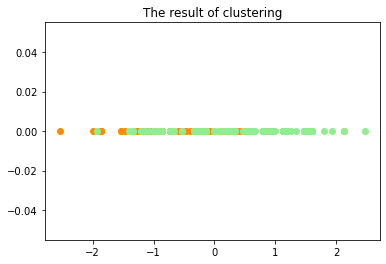

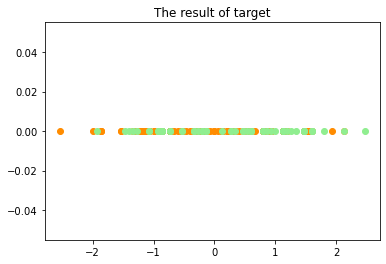

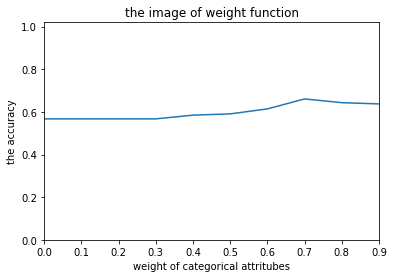

In [14]:
import OCIL 
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
df_Der = pd.read_table("./dermatology/dermatology.data", sep = ",")
df_Der = df_Der.dropna()
targetLabel = []
classification = 3
for i in range(classification):
    for j in range(len(df_Der.loc[df_Der["Classification"] <= 2,"Classification"].values)):
        if df_Der.loc[df_Der["Classification"] <= 2,"Classification"].values[j] == i+1:
            targetLabel.append(i)

df_Der.insert(34,"age1",np.zeros(358))
columnsD = df_Der.columns.values
columnsD = columnsD[0:32]

preDataN = df_Der.loc[df_Der["Classification"] <= 2,["age","age1"]].values
dataC = df_Der.loc[df_Der["Classification"] <= 2,columnsD].values
for i in range(preDataN.shape[1]):
    if i == 0:
        dataN = np.mat(preprocessing.scale(preDataN[:,i]))#.reshape(1,preDataN.shape[0])
    else:
        dataN = np.row_stack((dataN,np.mat(preprocessing.scale(preDataN[:,i]))))
dataN = dataN.T
clusterC, clusterN = OCIL.clusterUpdate(dataC, dataN, targetLabel)
OCIL.scatterShow(dataC, dataN, clusterC, clusterN, 20, 0.7, targetLabel, 0, 1)
clusterC, clusterN = OCIL.clusterUpdate(dataC, dataN, targetLabel)
OCIL.accuracyFigure(dataC,dataN,clusterC,clusterN,20,0.0,1.0,0.1,targetLabel)

### Next plan
The direction of change the weight of categorical attritubes may not work very effectively, so I want to change the directions in next week
1. introduce the weight of numerical attritubes
2. find the method to initilize the clustering center